In [23]:
import tensorflow as tf

# dataset download, process, and plot

In [24]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [25]:
x_train.shape

(60000, 28, 28)

In [26]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

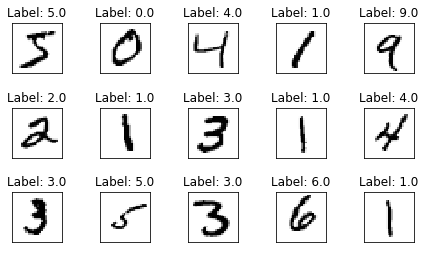

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(15):
    plt.subplot(3,5,i+1)  # row, col, index
    plt.tight_layout()  # auto layout
    plt.imshow(x_train[i], cmap='Greys')
    plt.title("Label: {}".format(y_train[i]))
    plt.xticks([])  # delete x ticks
    plt.yticks([])

# Sequential model

In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


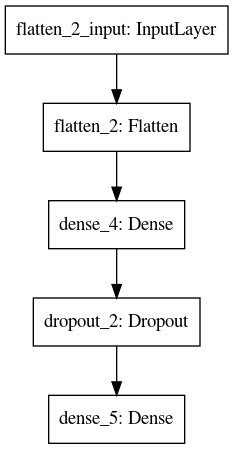

In [30]:
tf.keras.utils.plot_model(model, 'mnist_model.png')

In [31]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [32]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 2.8551 - accuracy: 0.7694
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5870 - accuracy: 0.8515
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4668 - accuracy: 0.8767
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4117 - accuracy: 0.8911
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3936 - accuracy: 0.8989


In [33]:
model.evaluate(x_val, y_val)

313/313 [==============================] - 1s 2ms/step - loss: 0.2576 - accuracy: 0.9430


[0.2575557231903076, 0.9430000185966492]

# Save model as .savedmodel

In [34]:
model.save('mnist_model')

INFO:tensorflow:Assets written to: mnist_model/assets


# Save model as HDF5

In [35]:
model.save('mnist_model.h5')